In [ ]:
!pip install statsmodels

In [1]:
import matplotlib

ModuleNotFoundError: No module named 'matplotlib'

## 1. Import Libraries 

In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import eda_helper_functions

## 2. Read the Training Data 

In [8]:
file_path = r"D:\Projects\sagemaker_flight_price_prediction\data\train.csv"

train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Banglore,New Delhi,08:55:00,19:10:00,615,1.0,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,17:30:00,04:25:00,655,1.0,In-flight meal not included,6540
2,Goair,2019-03-09,Banglore,New Delhi,11:40:00,14:35:00,175,0.0,No Info,7305
3,Air India,2019-06-12,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8366
4,Jet Airways,2019-03-12,Banglore,New Delhi,22:55:00,07:40:00,525,1.0,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...
6690,Jet Airways,2019-03-21,Delhi,Cochin,10:45:00,18:50:00,1925,2.0,No Info,11093
6691,Air India,2019-05-01,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8891
6692,Jet Airways,2019-06-01,Delhi,Cochin,14:00:00,19:00:00,300,1.0,In-flight meal not included,10262
6693,Air Asia,2019-06-24,Delhi,Cochin,07:55:00,13:25:00,330,1.0,No Info,6152


In [9]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [10]:
train = train.assign(**{
    col: pd.to_datetime(train.loc[:,col], format='mixed')
    for col in ['date_of_journey','dep_time','arrival_time']
})

### 3. High Level Summary of data 

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6695 non-null   object        
 1   date_of_journey  6695 non-null   datetime64[ns]
 2   source           6695 non-null   object        
 3   destination      6695 non-null   object        
 4   dep_time         6695 non-null   datetime64[ns]
 5   arrival_time     6695 non-null   datetime64[ns]
 6   duration         6695 non-null   int64         
 7   total_stops      6694 non-null   float64       
 8   additional_info  6695 non-null   object        
 9   price            6695 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 523.2+ KB


In [12]:
train.describe(include="number")

,duration,total_stops,price
count,6695.000000,6694.000000,6695.000000
mean,633.489171,0.801464,9030.965646
std,503.006311,0.659737,4639.522857
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5224.000000
50%,510.000000,1.000000,8283.000000
75%,922.500000,1.000000,12373.000000
max,2860.000000,3.000000,62427.000000


In [13]:
train.describe(include="O")

,airline,source,destination,additional_info
count,6695,6695,6695,6695
unique,9,5,6,7
top,Jet Airways,Delhi,Cochin,No Info
freq,2391,2730,2730,5249


### 4. High-level analysis of missing values in the dataset

In [16]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,
total_stops,1,0.014937


### 5. High Level Analysis of Outliers

In [22]:
from sklearn.ensemble import IsolationForest  # Isolation forest works only on numeric features

(
    train
    .assign(outlier = IsolationForest(n_estimators=10, random_state=42).fit_predict(train
                                                                                    .drop(columns='price')
                                                                                    .select_dtypes(include="number")))

    .query("outlier == -1")                                                                            
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
5,Jet Airways,2019-04-21,Banglore,Delhi,2026-02-08 18:55:00,2026-02-08 22:00:00,185,0.0,In-flight meal not included,4544,-1
7,Spicejet,2019-06-15,Mumbai,Hyderabad,2026-02-08 05:45:00,2026-02-08 07:15:00,90,0.0,No check-in baggage included,2647,-1
9,Jet Airways,2019-05-09,Delhi,Cochin,2026-02-08 23:05:00,2026-02-08 04:25:00,1760,2.0,No Info,15129,-1
10,Jet Airways,2019-06-12,Kolkata,Banglore,2026-02-08 14:05:00,2026-02-08 10:05:00,1200,1.0,No Info,13044,-1
12,Jet Airways,2019-06-24,Delhi,Cochin,2026-02-08 21:25:00,2026-02-08 19:00:00,1295,2.0,No Info,13292,-1
...,...,...,...,...,...,...,...,...,...,...,...
6687,Air India,2019-06-06,Kolkata,Banglore,2026-02-08 05:50:00,2026-02-08 08:55:00,1625,2.0,No Info,12723,-1
6688,Jet Airways,2019-06-15,Delhi,Cochin,2026-02-08 21:25:00,2026-02-08 12:35:00,910,2.0,In-flight meal not included,9905,-1
6689,Indigo,2019-03-03,Mumbai,Hyderabad,2026-02-08 09:10:00,2026-02-08 10:40:00,90,0.0,No Info,5755,-1
6690,Jet Airways,2019-03-21,Delhi,Cochin,2026-02-08 10:45:00,2026-02-08 18:50:00,1925,2.0,No Info,11093,-1


### 6. Pair plot 

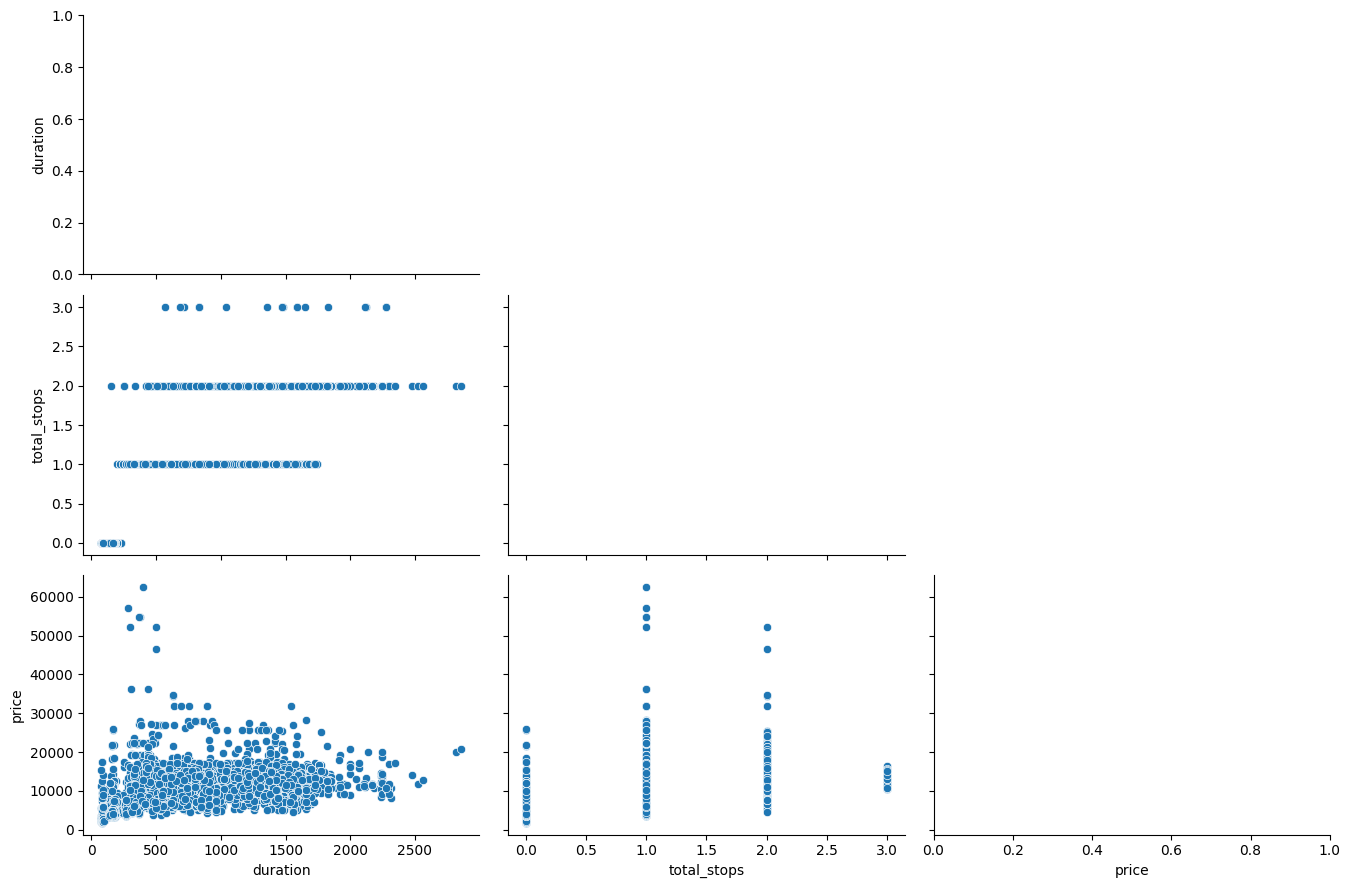

In [23]:
eda_helper_functions.pair_plots(train)

### 7. Correlation Analysis 

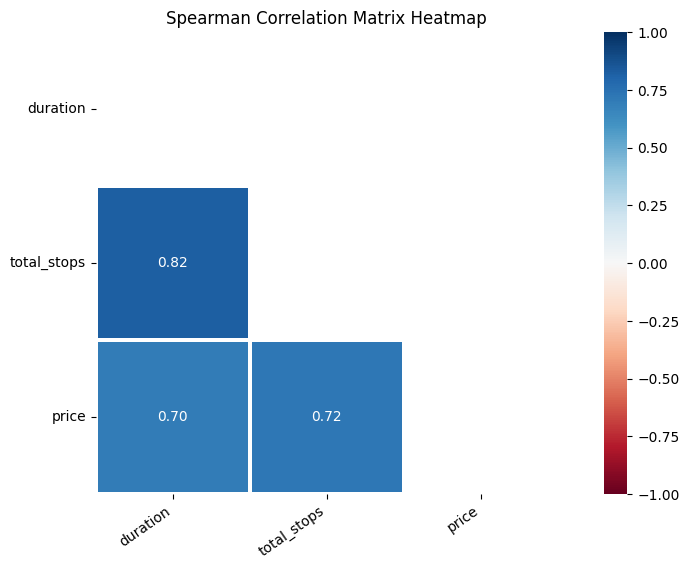

In [28]:
# sns.heatmap(train.select_dtypes(include="number").corr(), annot=True)
eda_helper_functions.correlation_heatmap(train)

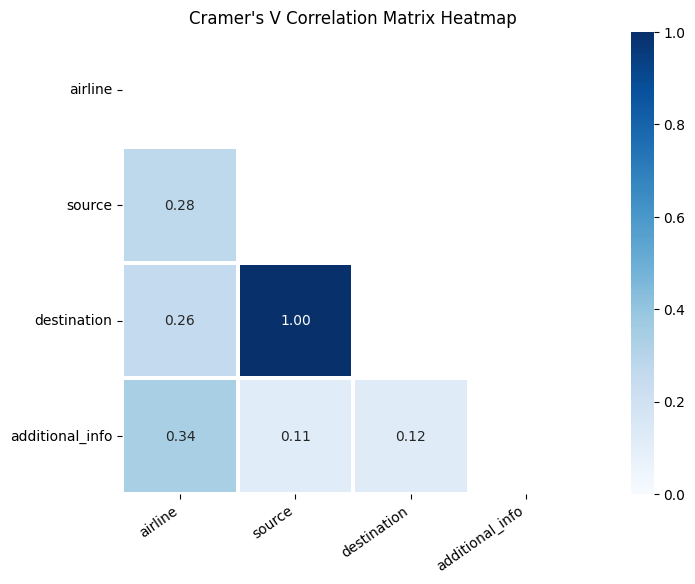

In [29]:
eda_helper_functions.cramersV_heatmap(train)

### 8. Detailed Analysis 

- Summary 
- Univariate plots 
- Bivariate plots(w.r.t the target variable)
- Hypothesis Testing(normality, strength of association)
- Multivariate plots 
- Inspect missing values and extreme values in-depth
- - Filter for necessary subsets 
- - Inspect values of other features(plots, summary stats)
- Note observations

In [7]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

8.1 airline 

In [8]:
eda_helper_functions.cat_summary(train,"airline")

0       Jet Airways
1       Jet Airways
2             Goair
3         Air India
4       Jet Airways
           ...     
6690    Jet Airways
6691      Air India
6692    Jet Airways
6693       Air Asia
6694      Air India
Name: airline, Length: 6695, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,695 / 6,695 rows


,
count,6695
unique,9
top,Jet Airways
freq,2391


,count,percentage
category,,
Jet Airways,2391,0.357132
Indigo,1296,0.193577
Air India,1076,0.160717
Multiple Carriers,736,0.109933
Spicejet,537,0.080209
Vistara,322,0.048096
Air Asia,211,0.031516
Goair,125,0.018671
Trujet,1,0.000149


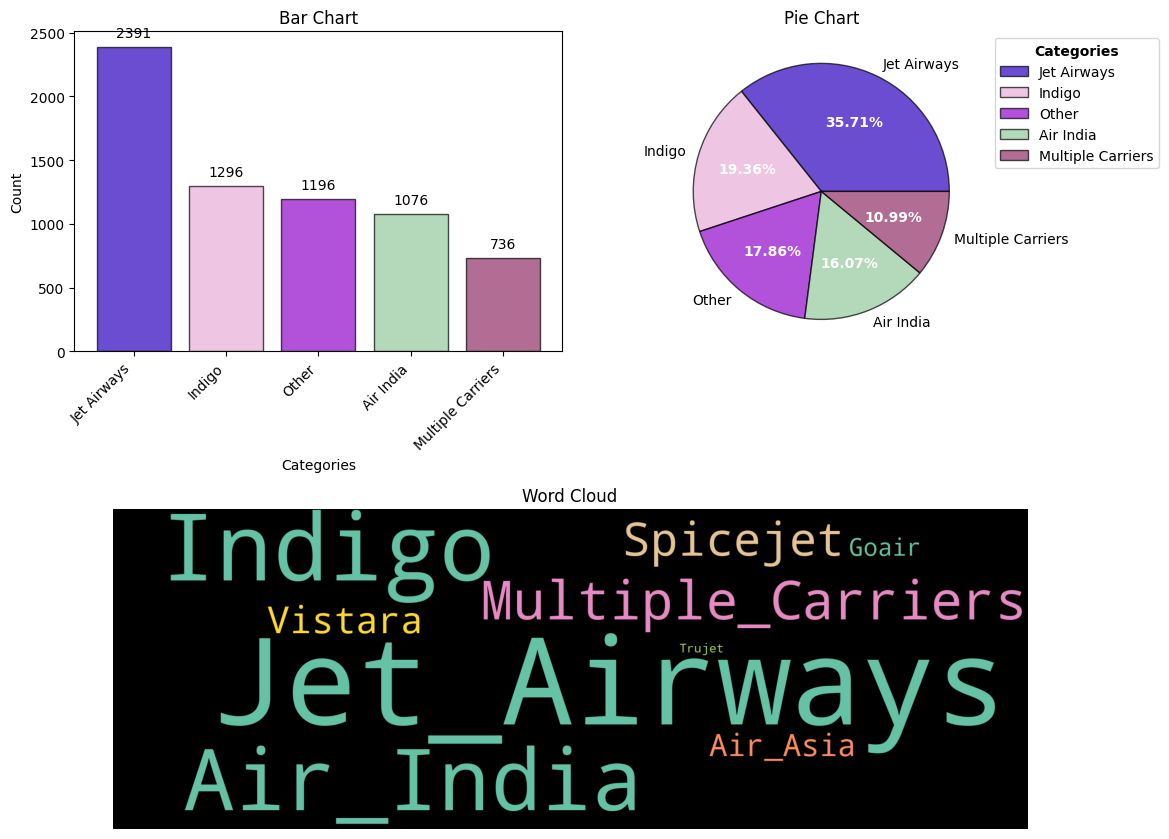

In [10]:
eda_helper_functions.cat_univar_plots(train,"airline",k=4)

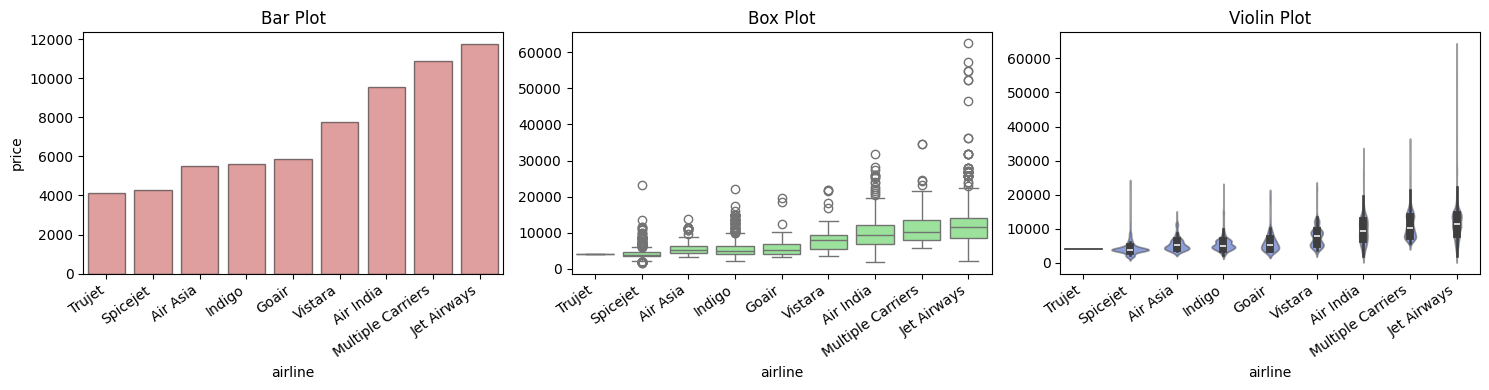

In [11]:
eda_helper_functions.num_cat_bivar_plots(
    data=train,
    num_var="price",
    cat_var="airline"
)

In [12]:
eda_helper_functions.num_cat_hyp_testing(train, "price","airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 473.2807027064633
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3131.4120748217883
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


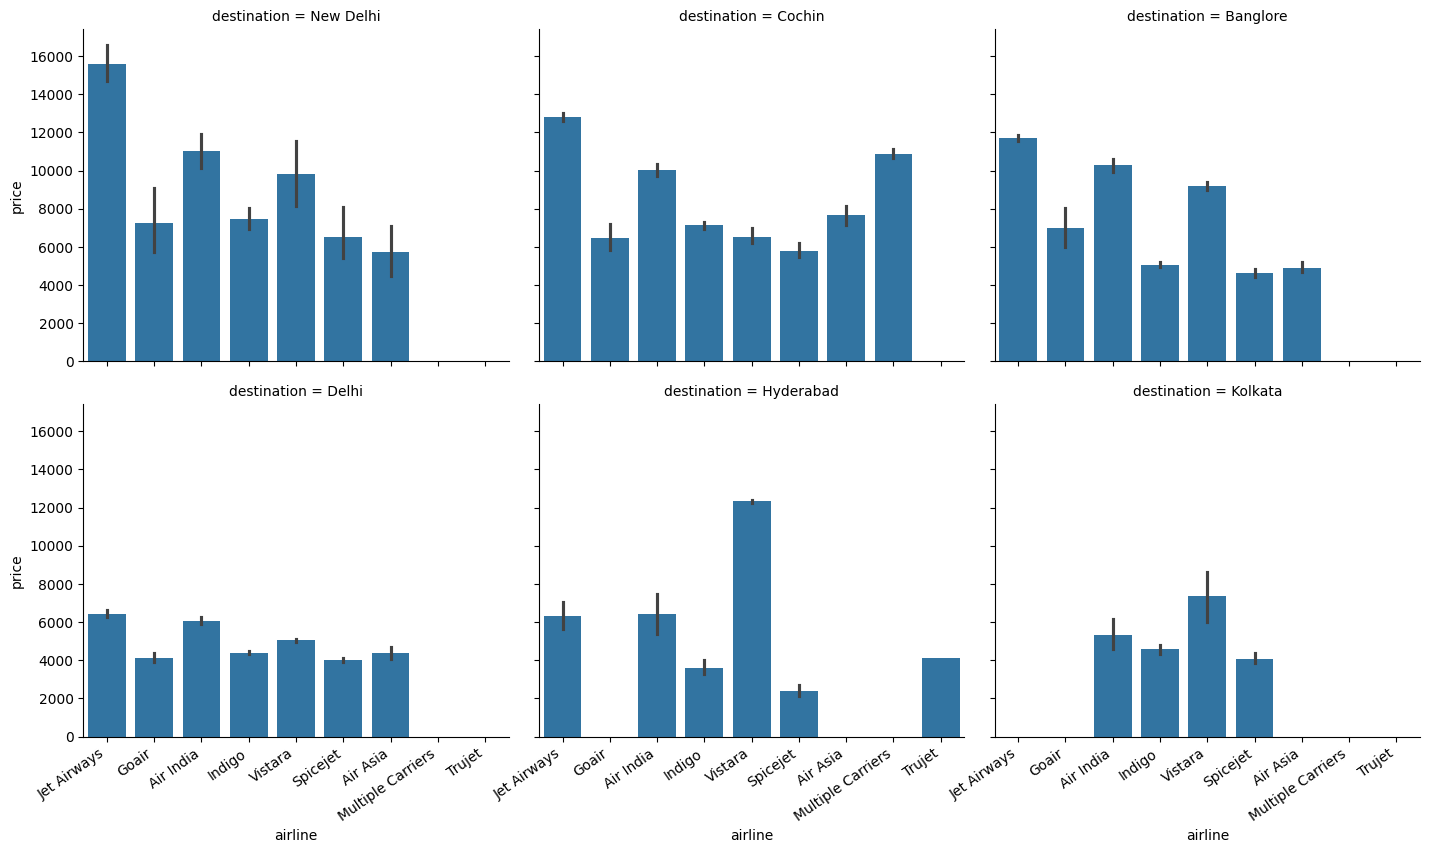

In [21]:
airline_grid = sns.FacetGrid(
    data=train,
    col="destination",
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=True
)

airline_grid.map(sns.barplot, "airline", "price")

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

8.2 date_of_journey

In [22]:
train.date_of_journey

0      2019-03-21
1      2019-03-27
2      2019-03-09
3      2019-06-12
4      2019-03-12
          ...    
6690   2019-03-21
6691   2019-05-01
6692   2019-06-01
6693   2019-06-24
6694   2019-03-01
Name: date_of_journey, Length: 6695, dtype: datetime64[ns]

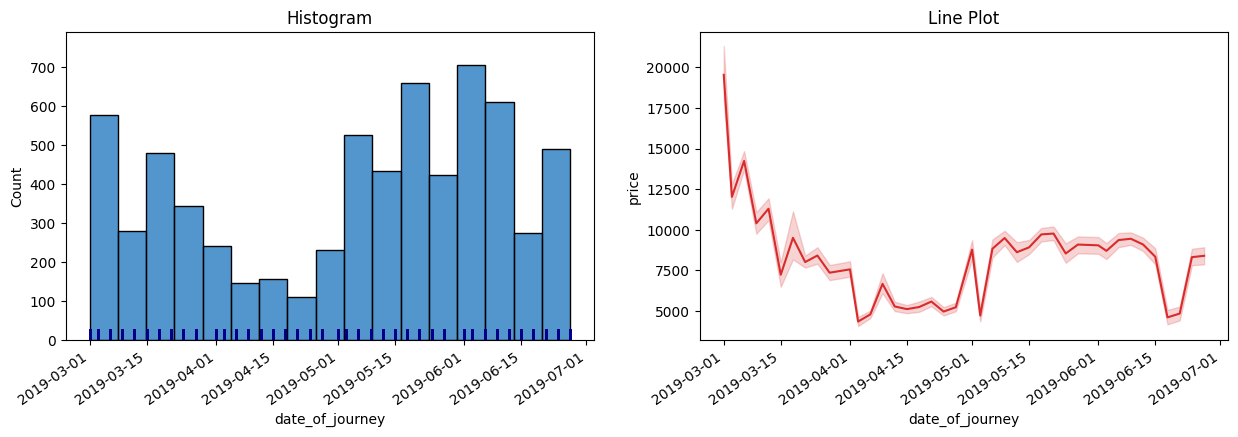

In [25]:
eda_helper_functions.dt_univar_plots(train, "date_of_journey","price")

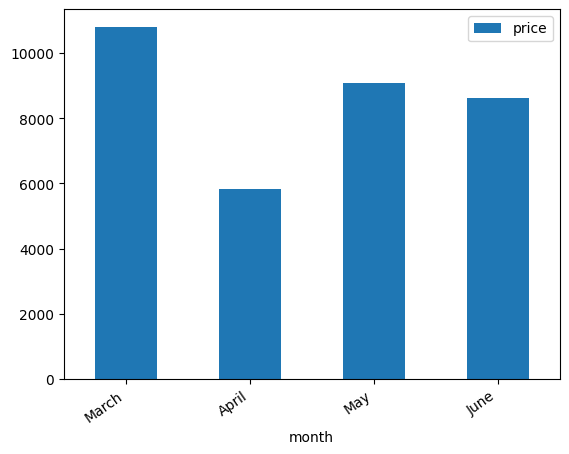

In [31]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey",freq="M"))
    .price.mean()
    .to_frame()
    .set_axis(["March","April","May","June"], axis=0)
    .rename_axis(index="month")
    .plot(kind="bar")
)
ax = plt.gca()  #get current access
eda_helper_functions.rotate_xlabels(ax)

weekly

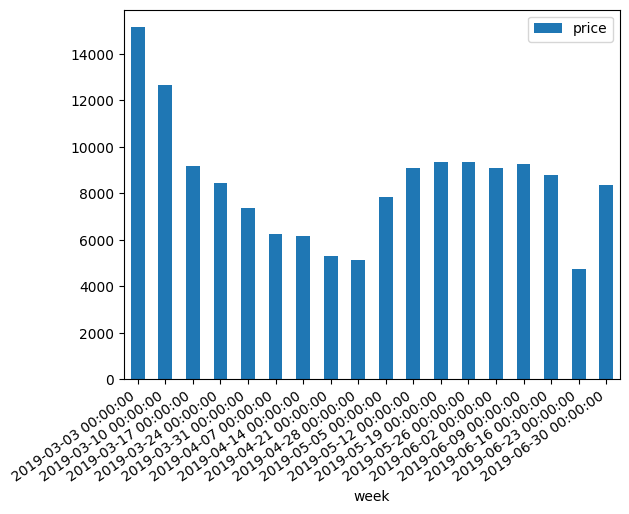

In [ ]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey",freq="W"))
    .price.mean()
    .to_frame()
    # .set_axis(["March","April","May","June"], axis=0)
    .rename_axis(index="week")
    .plot(kind="bar")
)
ax = plt.gca()  #get current access
eda_helper_functions.rotate_xlabels(ax)

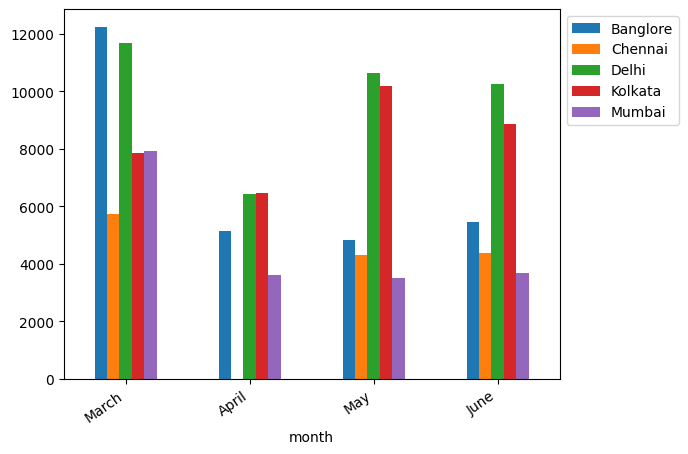

In [41]:
(
    train
    .groupby([pd.Grouper(key="date_of_journey",freq="M"),"source"])
    .price.mean()
    .unstack(fill_value=0)
    .set_axis(["March","April","May","June"], axis=0)
    .rename_axis(index="month")
    .plot(kind="bar")
)

ax = plt.gca()

ax.legend(
    loc = "upper left",
    bbox_to_anchor = (1,1)
)

eda_helper_functions.rotate_xlabels(ax)


8.3 dep_time

In [42]:
train.dep_time

0      2026-02-09 08:55:00
1      2026-02-09 17:30:00
2      2026-02-09 11:40:00
3      2026-02-09 09:25:00
4      2026-02-09 22:55:00
               ...        
6690   2026-02-09 10:45:00
6691   2026-02-09 09:25:00
6692   2026-02-09 14:00:00
6693   2026-02-09 07:55:00
6694   2026-02-09 11:50:00
Name: dep_time, Length: 6695, dtype: datetime64[ns]

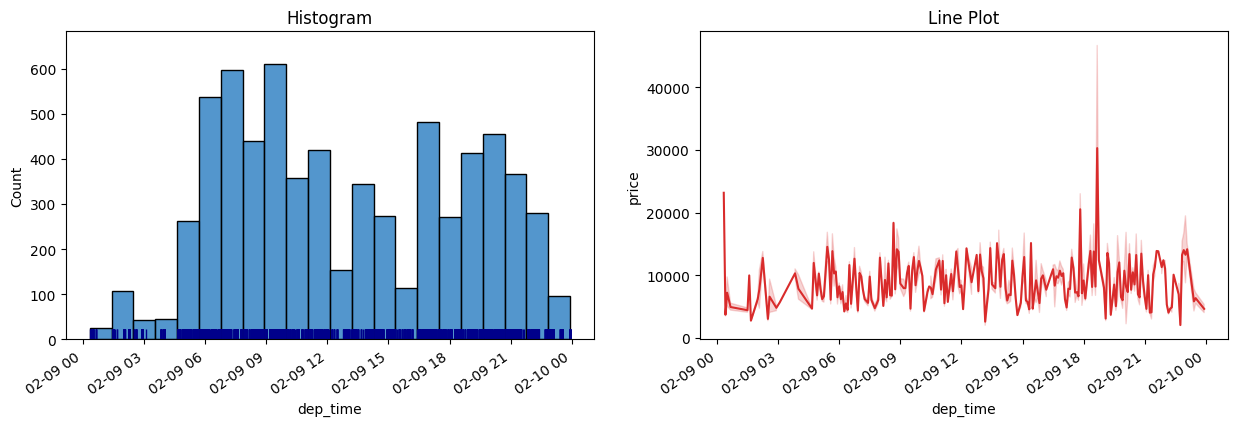

In [43]:
eda_helper_functions.dt_univar_plots(train, "dep_time","price")

In [48]:
(
    train
    .dep_time
    .dt.hour
    .pipe(lambda ser: pd.Series(np.select([ser.between(4,12,inclusive="left"),
                                 ser.between(12,16,inclusive="left"),
                                 ser.between(16,20,inclusive="left")],
                                ["morning",
                                 "afternoon",
                                 "evening"],
                                default="night")))
)

0         morning
1         evening
2         morning
3         morning
4           night
          ...    
6690      morning
6691      morning
6692    afternoon
6693      morning
6694      morning
Length: 6695, dtype: object

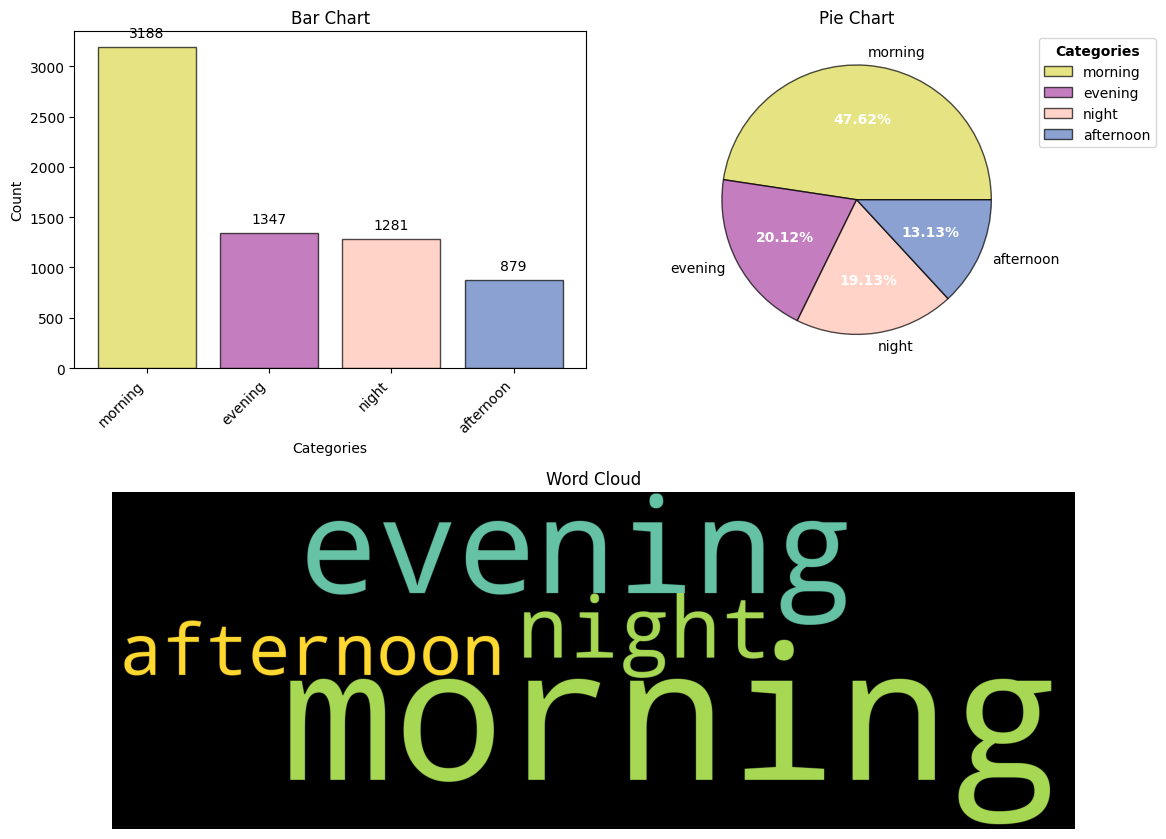

In [50]:
(
    train
    .assign(dep_time = lambda df_ :(
        np.select([df_.dep_time.dt.hour.between(4,12,inclusive="left"),
                  df_.dep_time.dt.hour.between(12,16,inclusive="left"),
                  df_.dep_time.dt.hour.between(16,20,inclusive="left")],
                  ["morning", "afternoon", "evening"],
                  default="night"
    )))
    .pipe(eda_helper_functions.cat_univar_plots,"dep_time")
)

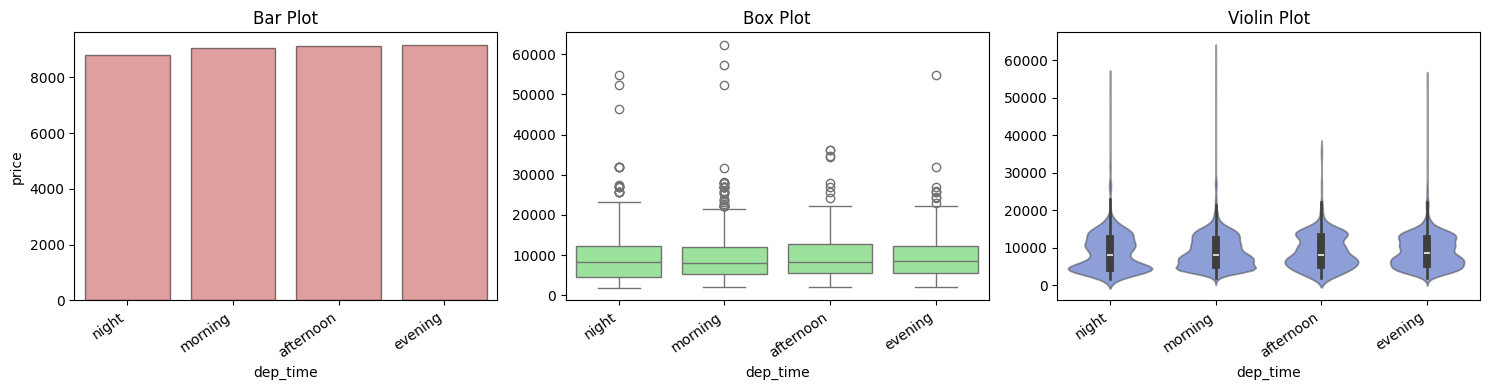

In [51]:
(
    train
    .assign(dep_time = lambda df_ :(
        np.select([df_.dep_time.dt.hour.between(4,12,inclusive="left"),
                  df_.dep_time.dt.hour.between(12,16,inclusive="left"),
                  df_.dep_time.dt.hour.between(16,20,inclusive="left")],
                  ["morning", "afternoon", "evening"],
                  default="night"
    )))
    .pipe(eda_helper_functions.num_cat_bivar_plots,"price","dep_time")
)

8.4 duration

In [52]:
train.duration

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: duration, Length: 6695, dtype: int64

In [54]:
eda_helper_functions.num_summary(train, "duration")

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: duration, Length: 6695, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,695 / 6,695 rows


,value
percentile,
0,75.0
5,90.0
10,145.0
25,170.0
50,510.0
75,922.5
90,1440.0
95,1601.5
99,1855.0


,value
mean,633.489171
trimmed mean (5%),599.711299
trimmed mean (10%),571.053761
median,510.000000


,value
var,253015.348516
std,503.006311
IQR,752.500000
mad,340.000000
coef_variance,0.794025


,value
skewness,0.893578
kurtosis,-0.053860


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 7.39934424543729e-57
Test Statistic       : 0.8865693123370929
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.752
Test Statistic       : 248.46369663341648
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


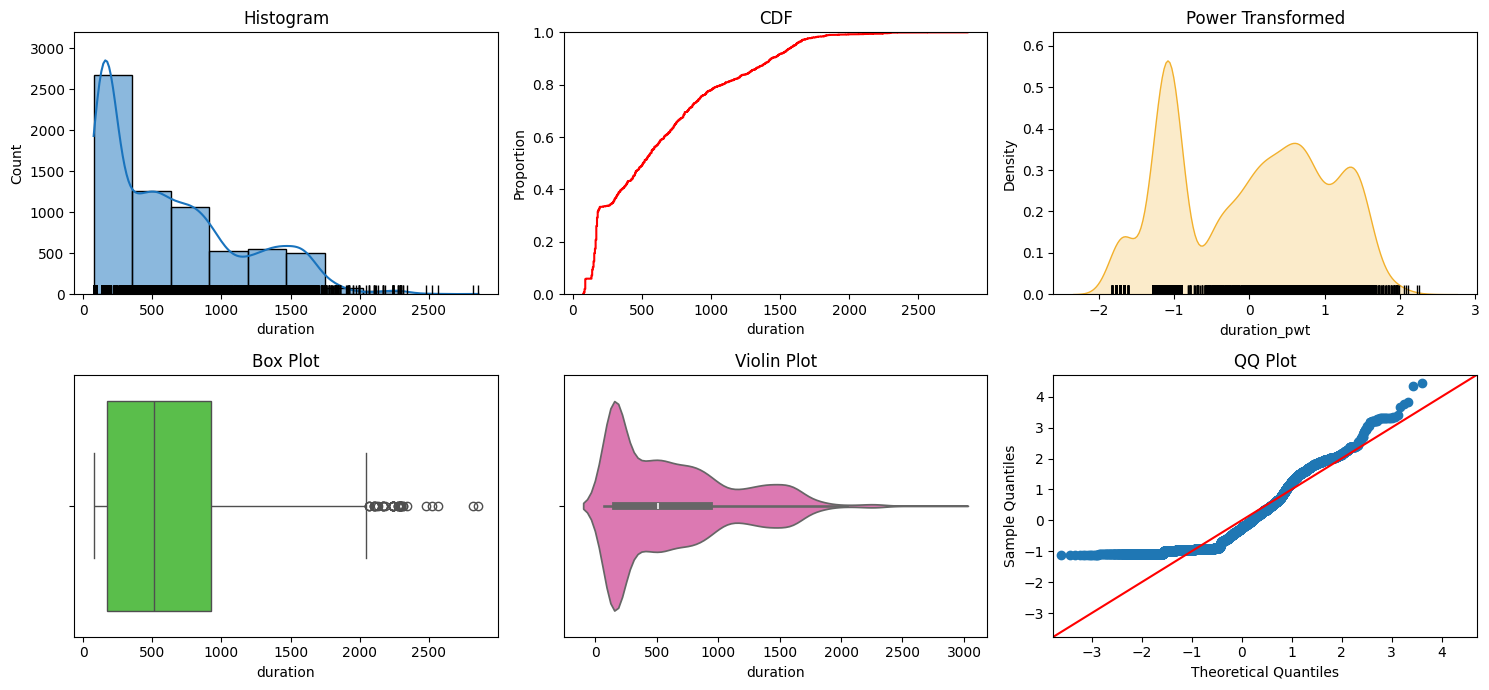

In [55]:
eda_helper_functions.num_univar_plots(train, "duration")

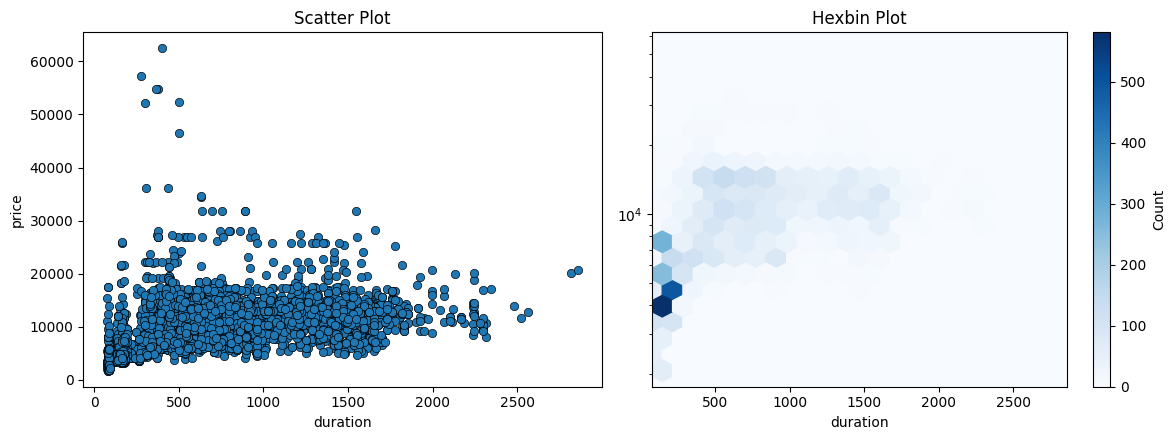

In [60]:
eda_helper_functions.num_bivar_plots(
    train,
    "duration",
    "price",
    hexbin_kwargs=dict(
        yscale = "log",
        gridsize = 20,
        cmap = "Blues"
    )
)

In [61]:
eda_helper_functions.num_num_hyp_testing(
    train,
    "duration",
    "price"
)

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.509012449177902
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and price are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6978600816697789
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and price are correlated


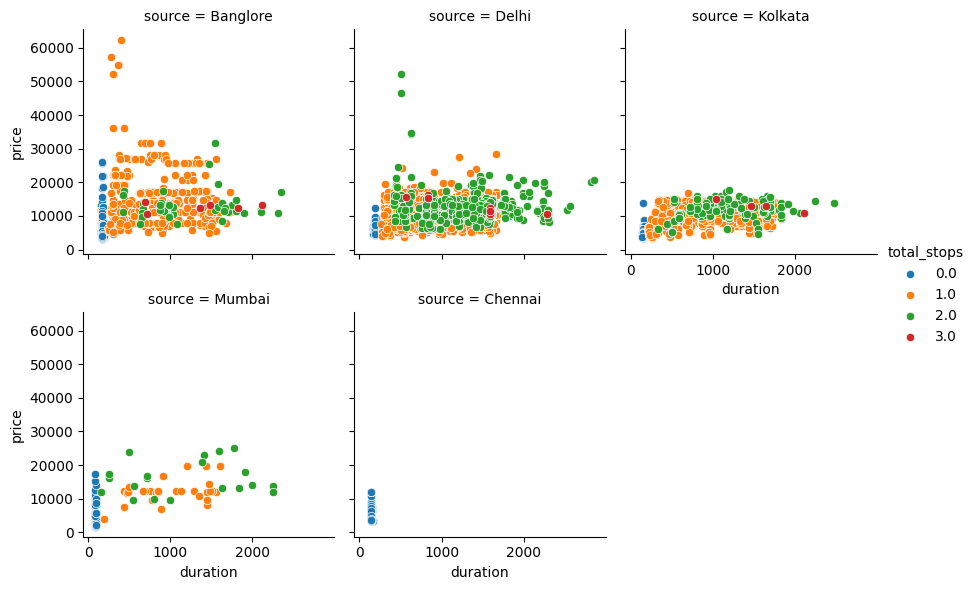

In [65]:
duration_gird = sns.FacetGrid(
    data=train,
    col="source",
    col_wrap=3,
    hue="total_stops",
    sharey=True
)

duration_gird.map(sns.scatterplot, "duration","price")
duration_gird.add_legend()

### 9. Automated Eda 

In [13]:
from ydata_profiling import ProfileReport

report = ProfileReport(train)

In [15]:
report

ModuleNotFoundError: No module named 'ipywidgets'

In [2]:
import numpy as np

print(np.__version__)

2.3.0
